In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import sklearn


from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
dataset = pd.read_csv('articles.csv')

#no null objects in the data

In [4]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


#Remove duplicates if any

In [5]:

dataset = dataset.drop_duplicates()
dataset = dataset.reset_index(drop = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [6]:
dataset.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [7]:
dataset['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

#observe category wise count

In [8]:

dataset.groupby('Category').agg({'Category':'count'})

,Category
Category,
business,336
entertainment,273
politics,274
sport,346
tech,261


#check distribution of the data

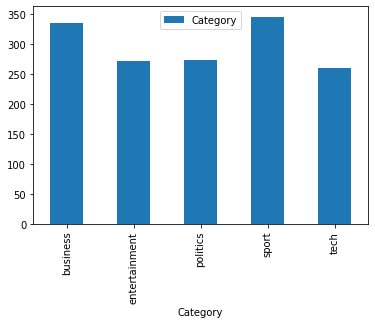

In [9]:

dataset.groupby('Category').agg({'Category':'count'}).plot.bar(ylim=0)

In [10]:
text = dataset["Text"] 
text.head()

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
Name: Text, dtype: object

In [11]:
category = dataset["Category"]
category.head()

0    business
1    business
2    business
3        tech
4    business
Name: Category, dtype: object

In [12]:
def preprocessDataset(train_text):
       
    #word tokenization using text-to-word-sequence
    train_text= str(train_text)
    tokenized_train_set = text_to_word_sequence(train_text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=" ")
        
    #removing of stopwords
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_set if not i in stop_words]

    stopwordremove_text = ' '.join(stopwordremove)
        
        
    #removing of numbers
    numberremove_text = ''.join(c for c in stopwordremove_text if not c.isdigit())
       
        
    #stemming
    stemmer= PorterStemmer()

    stem_input=nltk.word_tokenize(numberremove_text)
    stem_text=' '.join([stemmer.stem(word) for word in stem_input])
        
        
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    lem_input = nltk.word_tokenize(stem_text)
    lem_text= ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lem_input])
        
    return lem_text

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
dataset['Text'] = dataset['Text'].apply(preprocessDataset)
text = dataset['Text']
category = dataset['Category']
text.head()

0    worldcom ex bos launch defenc lawyer defend fo...
1    german busi confid slide german busi confid fe...
2    bbc poll indic econom gloom citizen major nati...
3    lifestyl govern mobil choic faster well funkie...
4    enron bos m payout eighteen former enron direc...
Name: Text, dtype: object

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(text,category, test_size = 0.2, random_state = 20,shuffle=True, stratify=category)

In [16]:
print(len(X_train))
print(len(X_test))

1192
298


Naive Bayes

In [17]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train,Y_train)

test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)


print("naive bayes accuracy Score : {}% ".format(train_accuracy ))
print("naive bayes test accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=dataset['Category'].unique()))

naive bayes accuracy Score : 99% 
naive bayes test accuracy Score  : 97% 

               precision    recall  f1-score   support

     business       0.99      0.97      0.98        68
         tech       0.96      0.98      0.97        54
     politics       0.96      0.98      0.97        54
        sport       1.00      0.99      0.99        70
entertainment       0.94      0.94      0.94        52

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



Decision Trees

In [18]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(X_train, Y_train)

test_predict = dt.predict(X_test)

train_accuracy = round(dt.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=dataset['Category'].unique()))

Decision Tree Train Accuracy Score : 100% 
Decision Tree Test Accuracy Score  : 83% 

               precision    recall  f1-score   support

     business       0.87      0.77      0.82        75
         tech       0.73      0.80      0.76        50
     politics       0.85      0.84      0.85        56
        sport       0.94      0.93      0.94        70
entertainment       0.73      0.81      0.77        47

     accuracy                           0.83       298
    macro avg       0.82      0.83      0.83       298
 weighted avg       0.84      0.83      0.83       298



Random Forest

In [19]:
rfc = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100)),
               ])

rfc.fit(X_train, Y_train)

test_predict = rfc.predict(X_test)

train_accuracy = round(rfc.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("RandomForest Train Accuracy Score : {}% ".format(train_accuracy ))
print("RandomForest Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=dataset['Category'].unique()))

RandomForest Train Accuracy Score : 100% 
RandomForest Test Accuracy Score  : 96% 

               precision    recall  f1-score   support

     business       0.99      0.94      0.96        70
         tech       0.95      0.96      0.95        54
     politics       0.96      0.98      0.97        54
        sport       1.00      0.97      0.99        71
entertainment       0.90      0.96      0.93        49

     accuracy                           0.96       298
    macro avg       0.96      0.96      0.96       298
 weighted avg       0.96      0.96      0.96       298



KNN


In [20]:

rfc = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', KNeighborsClassifier()),
               ])

rfc.fit(X_train, Y_train)

test_predict = rfc.predict(X_test)

train_accuracy = round(rfc.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("KNN Train Accuracy Score : {}% ".format(train_accuracy ))
print("KNN Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=dataset['Category'].unique()))

KNN Train Accuracy Score : 95% 
KNN Test Accuracy Score  : 94% 

               precision    recall  f1-score   support

     business       0.88      0.95      0.91        62
         tech       0.93      0.96      0.94        53
     politics       0.98      0.86      0.92        63
        sport       0.99      1.00      0.99        68
entertainment       0.90      0.90      0.90        52

     accuracy                           0.94       298
    macro avg       0.94      0.93      0.93       298
 weighted avg       0.94      0.94      0.94       298

